In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostClassifier

In [2]:
train = pd.read_csv('../Train/train_set_binary_encoding_geo_1_per_mortar_stone.csv')

train.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,count_floors_pre_eq_sum,age_sum,geo_level_multiply,geo_level_sum,geo_level_1_id_sum,geo_level_2_id_sum,geo_level_3_id_sum,geo_level_1_per_mud_mortar_stone,geo_level_1_sum_per_mud_mortar_stone,damage_grade
0,6,487,12198,2,30,6,5,1,1,0,...,156623,18028,35642556,12691,24381,270,37,6,24381,3
1,8,900,2812,2,10,8,7,0,1,0,...,156623,38896,20246400,3720,19080,199,16,8,19080,2
2,21,363,8973,2,10,5,5,0,1,0,...,156623,38896,68401179,9357,14889,1760,136,21,14889,3
3,22,418,10694,2,10,6,5,0,1,0,...,156623,38896,98342024,11134,6252,205,31,22,6252,2
4,11,131,1488,3,30,8,9,1,0,0,...,55617,18028,2144208,1630,8220,1038,122,0,0,3


In [4]:
X, y = train.iloc[:,:-1], train.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

In [5]:
cat = CatBoostClassifier(silent=True)
cat.fit(X_train, y_train)

In [6]:
preds = cat.predict(X_test)
f1_score(preds, y_test, average='micro')

0.7357353900464295

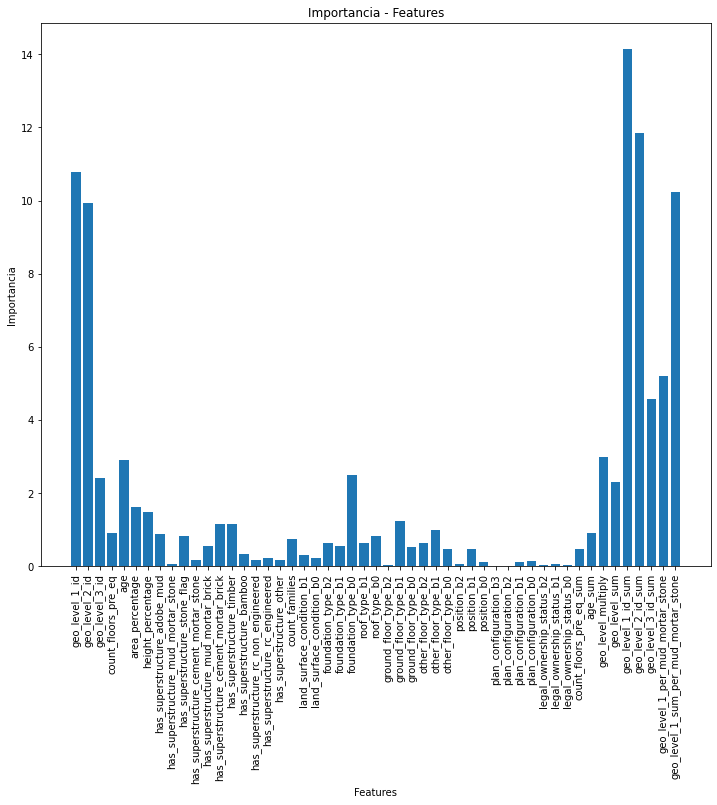

In [8]:
plt.figure(figsize=(12, 10))
plt.bar(X_train.columns, cat.feature_importances_)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importancia')
plt.title('Importancia - Features')
plt.show()